# NumPy

Before we get into NumPy and Pandas, I want to show (remind?) you that we can do basic descriptive statistics without ever importing a data science library in Python.

In [17]:
some_numbers = [26, 83, 35, 39, 31, 11, 30, 44, 42, 65, 30, 2, 29, 38, 43, 68]

# minimum, maximum, range
print("Min:", min(some_numbers))
print("Max:", max(some_numbers))
print("Range:", min(some_numbers), "-", max(some_numbers))

# sum, count, average
print("Sum:", sum(some_numbers))
print("Count:", len(some_numbers))
print("Average:", sum(some_numbers)/len(some_numbers))

Min: 2
Max: 83
Range: 2 - 83
Sum: 616
Count: 16
Average: 38.5


I guess if you want to call `statistics` a data science library, you do have to import _one_ data science library to get some of the descriptive statistics you might want to have.

In [18]:
import statistics

# mean, median, mode
print("Average (mean):", statistics.mean(some_numbers))
print("Median:", statistics.median(some_numbers))
# this will throw an error if you have a multi-modal distribution
print("Mode:", statistics.mode(some_numbers))

# measures of dispersion: variance, standard deviation
print("Population variance:", statistics.pvariance(some_numbers))
print("Population standard deviation:", statistics.pstdev(some_numbers))

Average (mean): 38.5
Median: 36.5
Mode: 30
Population variance: 385.25
Population standard deviation: 19.62778642639052


So... we can run all of those exciting functions on lists. Why would we need anything bigger?

Well.

For one thing, lists are slow. For another...

In [25]:
# 4 elements by 4 elements
some_more_numbers = [[26, 83, 35, 39], [31, 11, 30, 44], [42, 65, 30, 2], [29, 38, 43, 68]]

print(some_more_numbers)

# just a reminder that this is legal
print("First number:", some_more_numbers[0][0])
print("Last number:", some_more_numbers[3][3])

# print("Mode:", statistics.mode(some_more_numbers))

[[26, 83, 35, 39], [31, 11, 30, 44], [42, 65, 30, 2], [29, 38, 43, 68]]
First number: 26
Last number: 68


## NumPy
"Numerical Python" is a way for us to store and do *very fast* math with multi-dimensional arrays of numbers in Python. 

It underlies SciPy ("Scientific Python"), Pandas (which we'll talk about later tonight), Keras (a machine learning library), and TensorFlow (which our Artificial Intelligence class uses, and we _might_ use in DAT-202), and we get it for free with Anaconda Distribution.

It expects that every element is the same type -- an int or a float. 

In [2]:
# the traditional way we import numpy
import numpy as np

Now, we can create our own NumPy array, of course, but also, if we are trying to work on lists and find that we've hit a wall, as above, we can also cast lists into NumPy arrays:

In [32]:
np_nums = np.array(some_more_numbers)

# look how nicely it prints!
print(np_nums)

# note for coral: point out right-alignment of the 2

[[26 83 35 39]
 [31 11 30 44]
 [42 65 30  2]
 [29 38 43 68]]


In [52]:
# a NumPy array is literally a different type of thing than a multi-dimensional list:
print("Our 2-D list:", type(some_more_numbers))
print("Our np array:", type(np_nums))

Our 2-D list: <class 'list'>
Our np array: <class 'numpy.ndarray'>


### Creating a NumPy array

#### Arrays from Python native types
Restating: you can make a NumPy array from a list. Or a tuple! We're just type-casting here.

In [45]:
# from a list of lists
# restating what we did above; 
# just using a hard-coded list of lists:
np_nums = np.array([[26, 83, 35, 39], [31, 11, 30, 44], [42, 65, 30, 2], [29, 38, 43, 68]])

# same as np_nums = np.array(some_more_numbers) above

# from a tuple of tuples
np_tup_nums = np.array(((1, 2, 3), (4, 5, 6), (7, 8, 9)))

print(np_nums)
print("") #space
print(np_tup_nums)

[[26 83 35 39]
 [31 11 30 44]
 [42 65 30  2]
 [29 38 43 68]]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


#### Creating arrays full of constant values

* `.zeros((rows, columns), dtype=int/float)` - make a whole array of zeros
* `.full((rows, columns), value)` - make an array with an arbitrary value

In [36]:
# make an array of zeros:
np_zeros = np.zeros((5,5), dtype=int) # could also do float

# make an array of arbitrary whatevers
# in this case, we filled it with 13s
np_unlucky = np.full((13, 13), 13)

print(np_zeros)
print("") #space
print(np_unlucky)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]
 [13 13 13 13 13 13 13 13 13 13 13 13 13]]


#### Arrays with ranges of values

* `.arange(start, end, count_by)` - specify where you start, where you end, and **how much space between** elements
* `.linspace(start, end, num=how_many)` - specify where you start, where you end, and **how many** elements

In [51]:
# from 0 to 100, counting by 5s
# defaults to ints, but can be made into floats
np_range = np.arange(0, 100, 5)

# 15 points between 0 and 100
# floats!
np_lspace = np.linspace(0, 100, 15)

print(np_range)
print("") #space
print(np_lspace)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]

[  0.           7.14285714  14.28571429  21.42857143  28.57142857
  35.71428571  42.85714286  50.          57.14285714  64.28571429
  71.42857143  78.57142857  85.71428571  92.85714286 100.        ]


### Reshaping arrays

OK, those `arange()` and `linspace()` arrays are neat, but they're only one-dimensional? Sometimes, that's what you want, but often it isn't. I'll go so far as to say "usually," it isn't. It's fine, though, because we can reshape our data as needed. 

Let's fix it! 

Unsurprisingly, the command is `.reshape(rows, columns)`

In [67]:
# worth noting: arrays are not changed in place
np_range = np_range.reshape(4, 5)

np_lspace = np_lspace.reshape(3, 5)

print(np_range)
print("") # space
print(np_lspace)

[[ 0  5 10 15 20]
 [25 30 35 40 45]
 [50 55 60 65 70]
 [75 80 85 90 95]]

[[  0.           7.14285714  14.28571429  21.42857143  28.57142857]
 [ 35.71428571  42.85714286  50.          57.14285714  64.28571429]
 [ 71.42857143  78.57142857  85.71428571  92.85714286 100.        ]]


#### Flattening

OK, and let's say you have a multi-dimensional array that you want to make into a one-dimensional array. Cool.

In [110]:
np_flat_range = np_range.flatten()

# subtly different:
#np_flat_range = np_range.reshape(1, 20)

print(np_flat_range)

[ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]


### Getting things out of our arrays

We can slice NumPy arrays a lot like we'd slice lists, with one slight change in syntax. Instead of `list_name[x][y]`, we need to do `array_name[x, y]`. Otherwise, slicing is very similar. The main trick is keeping straight which is the row and which is the column.

In [37]:
# getting a single value out is slightly different:
# restating our array
np_nums = np.array([[26, 83, 35, 39], [31, 11, 30, 44], [42, 65, 30, 2], [29, 38, 43, 68]])

# comma notation instead of double-bracket notation
print("First value:", np_nums[0,0])
print("Last value:", np_nums[3,3])

First value: 26
Last value: 68


In [93]:
# getting out a row
print("First row:", np_nums[0])

First row: [26 83 35 39]


In [94]:
# getting out a column
print("First column:", np_nums[:, 0])

First column: [26 31 42 29]


In [99]:
# getting the middle four values
print("Second and third row, second and third column:\n", np_nums[1:3, 1:3])

Second and third row, second and third column:
 [[11 30]
 [65 30]]


In [101]:
# getting out non-adjacent rows
print("First and last row:\n", np_nums[[0, 3]])

#getting out non-adjacent columns
print("First and last column:\n", np_nums[:, [0, 3]])

First and last row:
 [[26 83 35 39]
 [29 38 43 68]]
First and last column:
 [[26 39]
 [31 44]
 [42  2]
 [29 68]]


A cool thing about NumPy arrays is that they know about themselves, so you can interrogate them:
* How many dimensions do you have? `.ndim`
* What shape are you? `.shape`
* How many elements do you have? `.size`
* How many bytes are there in an individual element? `.itemsize`
* What data type are your elements (in C)? `.dtype`

In [59]:
print("Dimensions:", np_nums.ndim)
print("Shape, (rows, columns):", np_nums.shape)
print("Size:", np_nums.size)
print("Size of an item in bytes:", np_nums.itemsize)
print("Data type of items:", np_nums.dtype)

Dimensions: 2
Shape, (rows, columns): (4, 4)
Size: 16
Size of an item in bytes: 8
Data type of items: int64


### Descriptive statistics

You knew were were coming back to this eventually.

In [69]:
print("Min:", np_nums.min())
print("Max:", np_nums.max())
print("Range:", np_nums.min(), "-", np_nums.max())
print("Sum:", np_nums.sum())
print("Count:", np_nums.size)
print("Average:", np_nums.mean())
# there isn't one for mode 
print("Variance:", np_nums.var())
print("Standard deviation:", np_nums.std())

Min: 2
Max: 83
Range: 2 - 83
Sum: 616
Count: 16
Average: 38.5
Variance: 385.25
Standard deviation: 19.62778642639052


#### Looping through a NumPy Array
I wanted to show you how to loop through an array anyway, so let's get the mode ourselves! (I'm not claiming this is the best possible way, or especially fast, but it will do the job, as long as there actually is a mode to be found.)

In [75]:
# make an empty dictionary to hold unique values from our array
vals_dict = {}

# loop through the array row by row, then each column within a row
for row in np_nums:
    for col in row:
        # just counting occurrences of particular values in the array
        if col in vals_dict:
            vals_dict[col] += 1
        else:
            vals_dict[col] = 1

# now we're pulling the value that appeared the most often
max_count = 0
max_val = 0
for val in vals_dict:
    if vals_dict[val] > max_count:
        max_count = vals_dict[val]
        max_val = val

mode = max_val
print("Mode:", mode)

Mode: 30


### Doing math with NumPy arrays

#### Scalars
There are a couple of different ways to do math (or "math," if you count Boolean comparisons as math) with arrays. You can apply a single value (a scalar) to the entire array, piecewise, which is known as "broadcasting":

In [76]:
# multiply every number in the array by the same amount
np_nums2 = np_nums * 2

print(np_nums)
print("\nAnd then multiply it by 2:\n")
print(np_nums2)

[[26 83 35 39]
 [31 11 30 44]
 [42 65 30  2]
 [29 38 43 68]]

And then multiply it by 2:

[[ 52 166  70  78]
 [ 62  22  60  88]
 [ 84 130  60   4]
 [ 58  76  86 136]]


In [77]:
# add the same amount to every number in the array
np_nums2 = np_nums + 2

print(np_nums)
print("\nAnd then add 2:\n")
print(np_nums2)

[[26 83 35 39]
 [31 11 30 44]
 [42 65 30  2]
 [29 38 43 68]]

And then add 2:

[[28 85 37 41]
 [33 13 32 46]
 [44 67 32  4]
 [31 40 45 70]]


In [81]:
print(np_nums)

# compare every number in the array with a set value
# recall, we calculated a mode:
print("\nOur mode:", mode, "\n\nIs each element greater than the mode?\n")

# so let's see how much of our array is larger than the mode
print(np_nums > mode)

[[26 83 35 39]
 [31 11 30 44]
 [42 65 30  2]
 [29 38 43 68]]

Our mode: 30 

Is each element greater than the mode?

[[False  True  True  True]
 [ True False False  True]
 [ True  True False False]
 [False  True  True  True]]


#### Math with multiple arrays

In [86]:
# set up two arrays, same dimensions
np_num1 = np.array(((1, 2, 3), (4, 5, 6), (7, 8, 9)))
np_num2 = np.full((3,3), 2)

print(np_num1)
print("") # space
print(np_num2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[2 2 2]
 [2 2 2]
 [2 2 2]]


In [89]:
# probably nothing surprising here?

## ADD
np_add = np.add(np_num1, np_num2)
print(np_add)
print("")

# exactly the same
np_add2 = np_num1 + np_num2
print(np_add2)

[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]

[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


In [91]:
## SUBTRACT
np_sub = np.subtract(np_num1, np_num2)
print(np_sub)
print("")

# exactly the same
np_sub2 = np_num1 - np_num2
print(np_sub2)

[[-1  0  1]
 [ 2  3  4]
 [ 5  6  7]]

[[-1  0  1]
 [ 2  3  4]
 [ 5  6  7]]


In [90]:
## MULTIPLY
np_mult = np.multiply(np_num1, np_num2)
print(np_mult)
print("")

# exactly the same
np_mult2 = np_num1 * np_num2
print(np_mult2)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


In [92]:
## DIVIDE
np_div = np.divide(np_num1, np_num2)
print(np_div)
print("")

# exactly the same
np_div2 = np_num1 / np_num2
print(np_div2)

[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]

[[0.5 1.  1.5]
 [2.  2.5 3. ]
 [3.5 4.  4.5]]


In [104]:
# this MIGHT be obvious, but it seems worth saying:
# we can do all of our math on subsets of arrays, too
np_num3 = np_num1[:, [0, 2]] + np_num2[:, [0, 2]]
print(np_num3)

[[ 3  5]
 [ 6  8]
 [ 9 11]]


# Matplotlib

This is not an in-depth intro to Matplotlib. This is me showing you how to make a single kind of graph, and pointing you at the documentation if you're interested in doing more. (It is very well documented!)

To be clear: you aren't stuck with line charts. There are also bar charts, scatter plots, histograms, and pie charts (ew). You can do all kinds of wild things with Matplotlib.

<IPython.core.display.Javascript object>


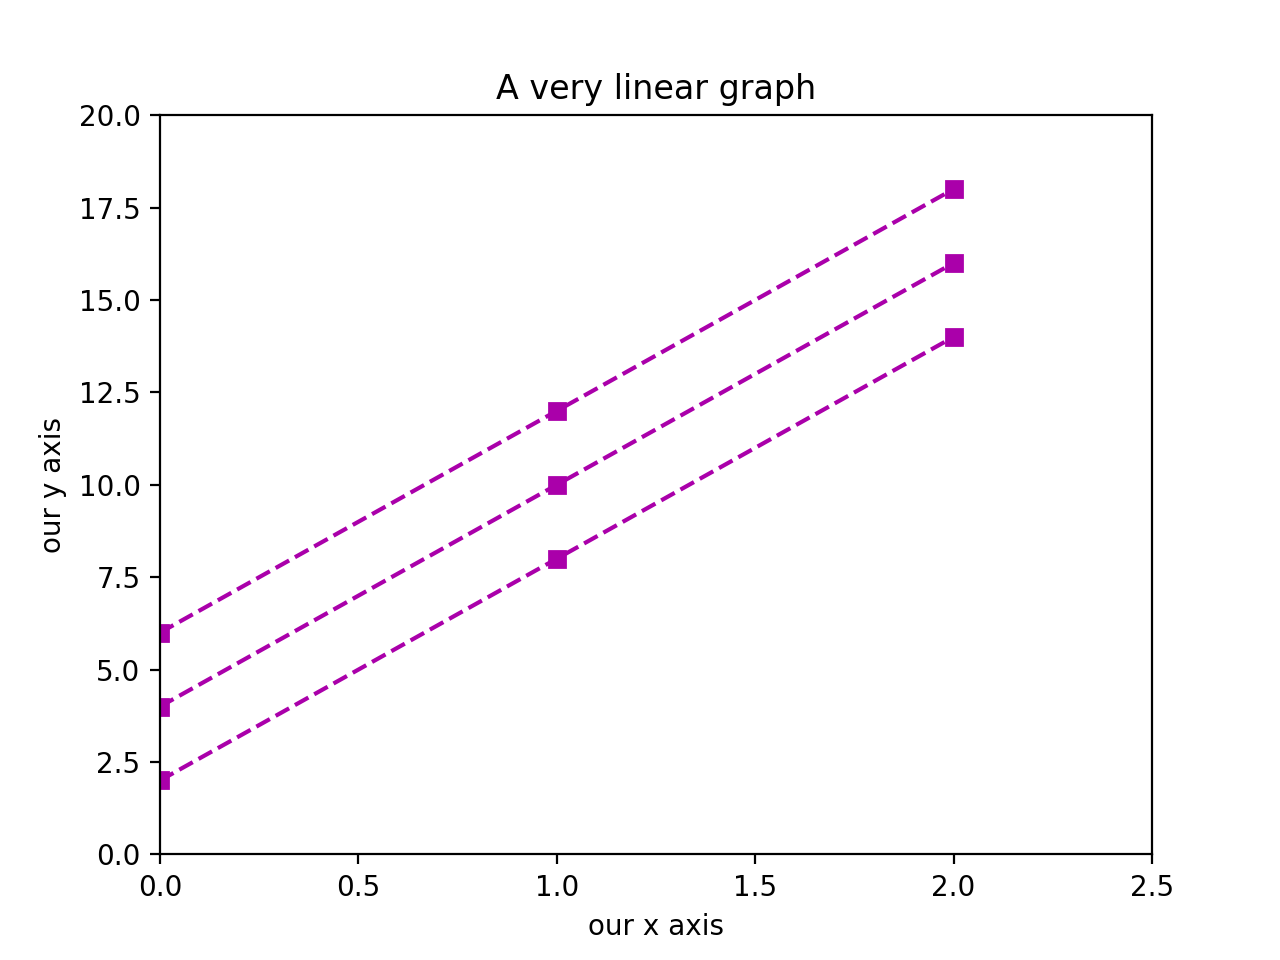

In [130]:
# lets us show matplotlib plots inline
%matplotlib notebook
# getting just the part we need and giving it a shorter name
from matplotlib import pyplot as plt

# telling matplotlib we're going to start a graph
plt.figure()
# it'll plot each row as a separate series, interestingly
plt.plot(np_mult, linestyle="--", color="#AA00AA", marker='s')
# this is more fun:
# plt.plot(np_mult[0], linestyle="dashed", color="#990033", marker='o')
# plt.plot(np_mult[1], linestyle="solid", color="#AA00AA", marker='s')
# plt.plot(np_mult[2], linestyle="dotted", color="#1100AA", marker='*')
# feed axis a list to set ranges:
# [x_start, x_end, y_start, y_end]
plt.axis([0, 2.5, 0, 20])
# put nice labels on
plt.xlabel("our x axis")
plt.ylabel("our y axis")
plt.title("A very linear graph")
# actually makes the graph show up
plt.show()

# Start here with the documentation: 
# https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py
